# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импорт библиотеки pandas. Чтение данных из csv-файла в датафрейм и сохранение в переменную data. 
# Путь к файлу: /datasets/real_estate_data.csv
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError as e:
    print(f"FileNotFoundError successfully handled\n"
          f"{e}")


In [2]:
# Вывод первых 20 строчек датафрейма `data` на экран.
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# Вывод основной информации о датафрейме с помощью метода info().
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
Видно, что в некоторых столбцах необходимо подкорректировать тип данных, поскольку он не совпадает с описанием. 
А так же надо поменять название столбца `cityCenters_nearest` - некорректное название, имеются прописные символы.

array([[<Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>],
       [<Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>],
       [<Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>]], dtype=object)

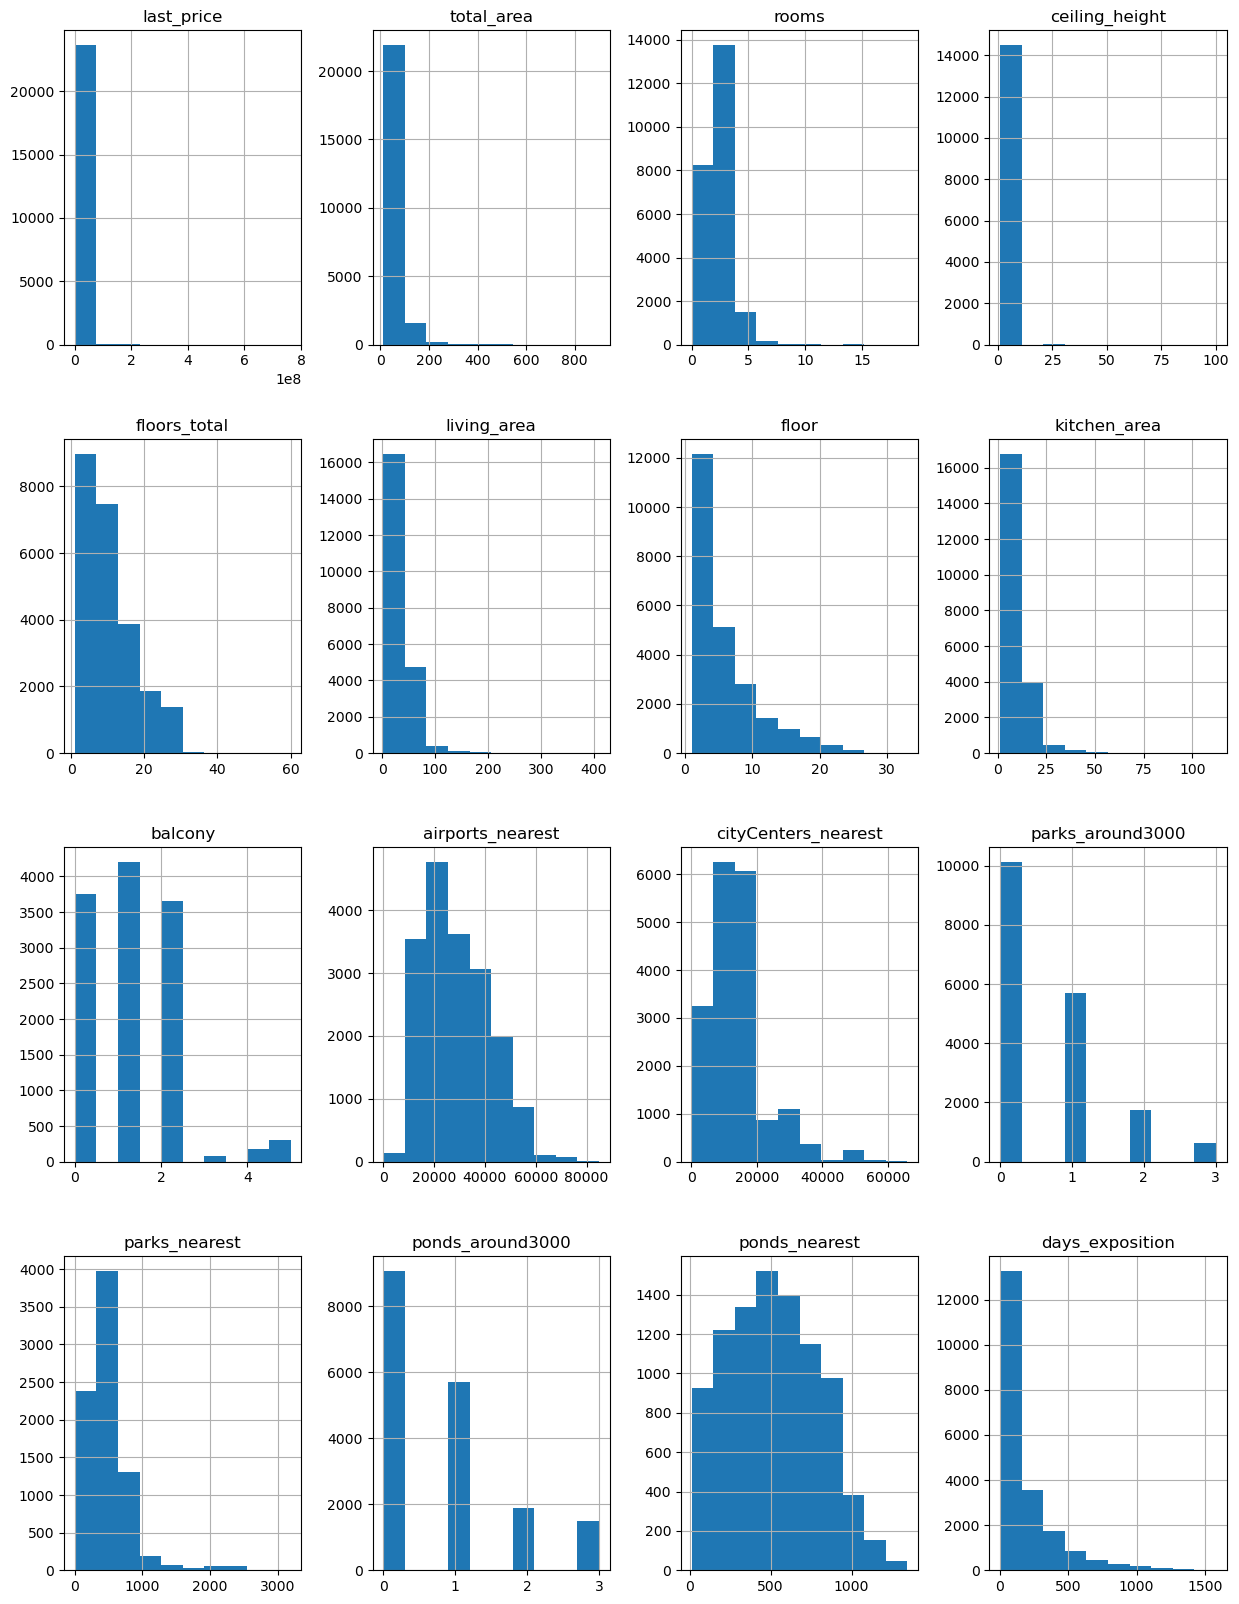

In [4]:
# Построение гистограммы для всех числовых столбцов таблицы на одном графике.

data.hist(
    column=[
        "last_price", 
        "total_area", 
        "rooms", 
        "ceiling_height", 
        "floors_total", 
        "living_area", 
        "floor",
        "kitchen_area",
        "balcony",
        "airports_nearest",
        "cityCenters_nearest",
        "parks_around3000",
        "parks_nearest",
        "ponds_around3000",
        "ponds_nearest",
        "days_exposition"
    ], figsize=(15, 20)
)

На первый взгляд графики выглядят более-менее корректно, но нужен более тщательный анализ значений. 
Перед исследованием необходимо провести предобработку данных.

### Предобработка данных

Первым делом поменяем название столбцу `cityCenters_nearest`, который назван некорректно. Новое название будет `city_centers_nearest`.

In [5]:
# Переименование столбца в таблице
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Проверим в каких столбцах встречаются пустые значения.

In [6]:
# Проверка количества пропущенных значений по каждому столбцу
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наблюдаются пропущенные данные в некоторых столбцах, каждый из них придется проанализировать отдельно, и принять решение, 
что делать с пустыми значениями.

Столбец `is_apartmet` имеет очень много пропущенных значений. Но признак очень важный для анализа покупки недвижимости,
он означает является ли квартира апартментами или нет. В апартаментах нельзя прописаться и получить за них налоговый вычет, поэтому они стоят дешевле.

In [7]:
# Список возможных значений в поле is_apartment
data['is_apartment'].value_counts()


is_apartment
False    2725
True       50
Name: count, dtype: int64

Поскольку значений, с пропущенным параметром очень много (только 12% заполнены), можно предположить, что он должен быть у всех - False, т.е. по умолчанию, квартира считается - не апартаментами, иначе бы стоял флажок - True. Поменяем и тип данных у данного столбца на bool для удобства работы с ним.

In [8]:
# Проставляем в столбце is_apartment значение False вместо NaN
data['is_apartment'] = data['is_apartment'].fillna(False)
# Поменяем тип данных столбцу на bool, согласно описанию данных
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].value_counts()


is_apartment
False    23649
True        50
Name: count, dtype: int64

Столбец `balcony` тоже имеет очень много пропущенных значений, почти у половины всех данных. Посмотрим, какие там встречаются данные.

In [9]:
# Список возможных значений в поле balcony
data['balcony'].value_counts()


balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

С данными все хорошо, аномальных не наблюдается, только необходимо поменять тип данных столбца на целочисленный. Параметр может принимать только дискретное целочисленное значение. 

Пропуски можно заменить на число 0, поскольку если продавец не указал данный параметр, значит балконов в квартире нет.

In [10]:
# Проставляем в столбце balcony значение 0 вместо NaN
data['balcony'] = data['balcony'].fillna(0)
# Поменяем тип данных столбцу на int
data['balcony'] = data['balcony'].astype('int')
data['balcony'].value_counts()

balcony
0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: count, dtype: int64

In [11]:
# Удаление объявлений с пустым значением locality_name
data = data.dropna(subset=['locality_name'])
# Количество уникальных населенных пунктов
print(data['locality_name'].nunique())
# Посмотрим список населеднных пунктов
print(sorted(data['locality_name'].unique()))

364
['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня А

Изучение уникальных значений в столбце `locality_name` показало наличие неявных дубликатов. Поменяем названия населенных пунктов, что в дальнейшем позволит избавиться от явных дубликатов.

In [12]:
# Корректируем написание населенных пунктов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции', 'поселок станции'], 'поселок', regex=True)
)

In [13]:
# Количество уникальных населенных пунктов
print(data['locality_name'].nunique())

319


In [14]:
# Удаляем строки с пустым значением в столбце `floors_total`, таких в данных было 86
data = data.dropna(subset=['floors_total'])
# Поменяем тип данных столбцу на int
data['floors_total'] = data['floors_total'].astype('int')
print(sorted(data['floors_total'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 52, 60]


Аномальных значений в столбце `floors_total` нет, все данные в пределах нормы.

Проанализируем столбец с данными о высоте потолков - `ceiling_height`. В нем так же встречается очень много пропущенных значений.

In [15]:
# Вывод на печать значений из столбца ceiling_height
print(sorted(data['ceiling_height'].unique()))


[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Наблюдаются очень большие значения - 25м, 32м, 27м. Это очень похоже на ошибку ввода данных, потерялась точка в вещественных значениях - 2.5, 3.2, и 2.7м. Разделим на 10 все значения больше 20м

In [16]:
# Преобразование значений в столбце ceiling_height
data['ceiling_height'] = (
    data['ceiling_height']
    .where(data['ceiling_height'] < 20, round(data['ceiling_height']/10, 2))
)
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.26, 2.7, nan, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 

Высоту потолков можно проставить всем пропущенным значениям, как медиану по всем данным.

In [17]:
# Восстановление пропущенных значений в поле ceiling_height медианным значением по всем квартирам
data.loc[data['ceiling_height'].isna(), 'ceiling_height']  = data['ceiling_height'].median()
print(sorted(data['ceiling_height'].unique()))


[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.26, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 

In [18]:
print(data.query('ceiling_height < 2')['ceiling_height'].count())

3


Есть небольшое количество записей со значением высоты потолков меньше 2 метров (таких значений 3), это слишком мало для стандартной квартиры, и данных очень мало. Удалим их.

In [19]:
# Удаляем записи со значением поля ceiling_height меньше 2 метров
data = data.query('ceiling_height >= 2')

Пропущенные значениями в `kitchen_area` и `living_area` можно восстановить по коэффициенту отношения к общей площади квартиры. Если бы в таблице хранилась информация о типе/серии квартиры, площадь кухни и жилую площадь можно было бы найти как медианное значение среди записей с таким типом. 

In [20]:
# Восстановление пропущенных значений в поле living_to_total медианным значением коэфициента отношения к общей площади
# по всем квартирам, умноженным на общую площадь конкретной квартиры
data.loc[data['living_area'].isna(), 'living_area']  = (data['living_area']/data['total_area']).median() * data['total_area']
# Восстановление пропущенных значений в поле kitchen_to_total медианным значением коэфициента отношения к общей площади
# по всем квартирам, умноженным на общую площадь конкретной квартиры
data.loc[data['kitchen_area'].isna(), 'kitchen_area']  = (data['kitchen_area']/data['total_area']).median() * data['total_area']

Большое количество данных в таблице с незаполненными значениями, которые должны быть получены автоматически. Вероятно, техническая ошибка сбора данных. У части населенных пунктов не проставлены следующие параметры:

- `airports_nearest`
- `city_centers_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`

Посмотрим на примере поля `city_centers_nearest`. Найдем список населенных пунктов у которых поле заполнено, и наоборот. Найдем пересечение этих множеств.

In [21]:
# Нахождение списка населенных пунктов, по которым пропущены данные в столбце city_centers_nearest, 
# но есть данные в других аналогичных значениях.
nearest_is_not_null = data.loc[data['city_centers_nearest'] > 0]
nearest_is_null = data.loc[data['city_centers_nearest'].isna()]

inner_name = list(set(nearest_is_null['locality_name'].unique()) & set(nearest_is_not_null['locality_name'].unique()))

for t in inner_name:
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest'].median()

    
nearest_is_null.query('locality_name in @inner_name')['locality_name'].value_counts()


locality_name
Санкт-Петербург    60
поселок Шушары      3
Красное Село        2
Ломоносов           1
Кронштадт           1
Пушкин              1
Колпино             1
Name: count, dtype: int64

Список пересечений не пустой, восстановим им значения медианным растоянием среди всех записей с тем же населенным пунктом.
Остальные строки, с пропущенными значениями оставим как есть. Восстановить остальные пропущенные данные не получится. Позже проанализируем эти данные.

В целом, походже, что в таблице значения для вышеописанных полей автоматически расставлены только ограниченному набору населенных пунктов. 


В поле `days_exposition` тоже много пропущенных значений, это означает, что объяления о продажи квартиры до сих пор не сняты с продажи. Пропущенные значения не будем проставлять нулевым значением, но можно добавить новый столбец, в который добавим значение False, если объявление снято с продажи после покупки, и True, если объявление до сих пор актуально.


После всех преобразований удалим явные дубликаты в таблице.

In [22]:
# Удаление явных дубликатов
data = data.drop_duplicates()

In [23]:
# Проверка количества пропущенных значений по каждому столбцу
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
city_centers_nearest     5431
parks_around3000         5499
parks_nearest           15533
ponds_around3000         5499
ponds_nearest           14528
days_exposition          3171
dtype: int64

In [24]:
# Вывод основной информации о датафрейме с помощью метода info().
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23562 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23562 non-null  int64  
 1   last_price            23562 non-null  float64
 2   total_area            23562 non-null  float64
 3   first_day_exposition  23562 non-null  object 
 4   rooms                 23562 non-null  int64  
 5   ceiling_height        23562 non-null  float64
 6   floors_total          23562 non-null  int32  
 7   living_area           23562 non-null  float64
 8   floor                 23562 non-null  int64  
 9   is_apartment          23562 non-null  bool   
 10  studio                23562 non-null  bool   
 11  open_plan             23562 non-null  bool   
 12  kitchen_area          23562 non-null  float64
 13  balcony               23562 non-null  int32  
 14  locality_name         23562 non-null  object 
 15  airports_nearest      18


Предварительный анализ и обработка данных завершена. Было выявлено много пропущенных данных, как в части, которую пользователь заполняет самостоятельно, так и в автоматической части данных.

Во втором случае необходимо проверить автоматизацию процесса определения соответствующих параметров по геолокации и записи в таблицу.

Для параметров, которые вводятся вручную ошибки могли произойти вследствии технического сбоя при получении данных из БД, хранения информации или человеческого фактора.

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
# Добавление нового столбца price_to_metre: цена одного квадратного метра
data['price_to_metre'] = round(data['last_price'] / data['total_area'], 2) 


In [26]:
# Добавление нового столбца days_exposition_type: актуальность объявления
data['days_exposition_type'] = data['days_exposition'].isna()
# Добавление нового столбца day_week_exposition: день недели публикации
data['day_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
# Добавление нового столбца month_exposition: месяц публикации
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
# Добавление нового столбца year_exposition: год публикации
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [27]:
def def_floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

# Добавление нового столбца floor_type: тип этажа квартиры ("первый", "последний", "другой")
data['floor_type'] = data.apply(def_floor_type, axis=1)    


In [28]:
# Добавление нового столбца city_centers_nearest_km: расстояние до центра города в километрах
data['city_centers_nearest_km'] = (
    data['city_centers_nearest']
    .where(data['city_centers_nearest'] < 0, round(data['city_centers_nearest']/1000, 2))
)


### Проведите исследовательский анализ данных

**4.1. Анализ данных по столбцу `total_area` - общая площадь квартиры**


In [29]:
# Список основных статистических характеристик данных по числовому столбцу total_area
data['total_area'].describe()

count    23562.000000
mean        60.324656
std         35.658884
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<Axes: title={'center': 'Количество объявлений по общей площади'}, ylabel='Frequency'>

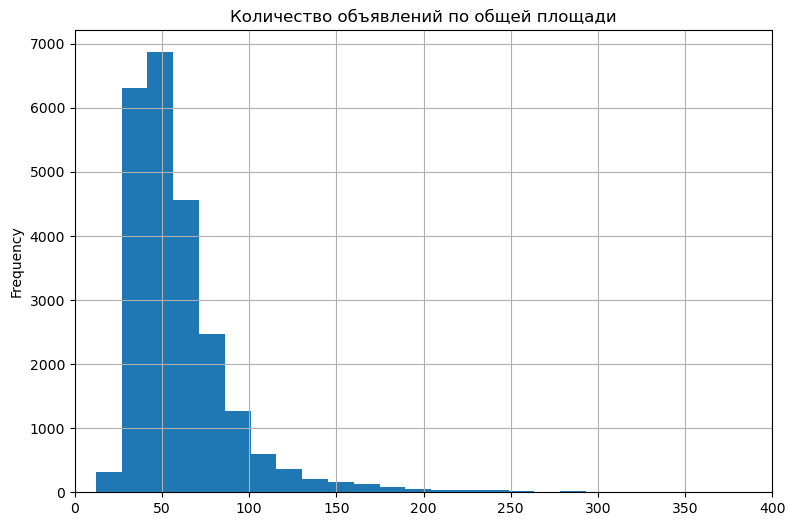

In [30]:
# Построение гистограммы по данным из столбца total_area
data['total_area'].plot(kind='hist', title='Количество объявлений по общей площади', bins=60, xlim=(0,400), grid=True, figsize=(9,6))

Гистаграмма в целом имеет красивый правильный вид. Есть аномальные маленькие значения, а так же есть огромные значения больше 300 кв.м. Среднее арифметическое значение и медианное значение примерно похожи, 60 и 52 кв.м. соответственно. На среднее значение очень влияют квартиры с огромным метражом. 

Анализируя эти данные можно предположить, что самые популярые в продаже квартиры двухкомнатные или однокомнатные, ниже при анализе количества комнат проверим нашу гипотезу. 

Маленькие значения тоже в целом вполне объяснимы, это могут быть переделки полноценных квартир в более маленькие, дешевые, чтобы лечге их продать. Анализ огромных квартир - затруднителен, тут необходима консультация со специалистом отдела недвижимости. На самом ли деле такие квартиры продаются на Яндекс.Недвижимости, или это какая-то ошибка. Максимальная площадь квартиры в наших данных 900 кв.м.

In [31]:
def iqr_parameter (q1, q2):
    # Межквартильый размах 
    iqr = q2 - q1
    # "Усы" размаха
    iqr_mn = q1 - 1.5*iqr
    iqr_mx = q2 + 1.5*iqr

    print('IQR:', iqr)
    print('Q1 - 1.5 IQR:', iqr_mn)
    print('Q3 + 1.5 IQR:', iqr_mx)
    
    return iqr_mx

# Значение, характеризующее начало вбросов для столбца total_area
iqr_total_area_mx = iqr_parameter((data['total_area'].describe())['25%'], (data['total_area'].describe())['75%'])


IQR: 29.700000000000003
Q1 - 1.5 IQR: -4.550000000000004
Q3 + 1.5 IQR: 114.25


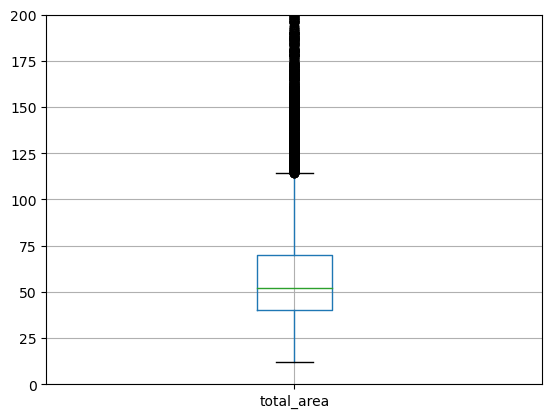

In [32]:
plt.ylim(0, 200)

data.boxplot(column='total_area')
plt.show()

Анализ диаграммы размаха показал, что общая площадь квартиры выше 114 кв.м. - выбросы.

In [33]:
print(
    'Выбросов в столбце `total_area`:{:.0%}'
    .format(
        (data.query('total_area > 114')['total_area'].count())/(data['total_area'].describe())['count']
    )
)

Выбросов в столбце `total_area`:5%


Таких данных получилось не много, удалим их, чтобы в дальнейшем они не мешали при анализе.

In [34]:
# Удаляем записи со значением поля total_area больше, чем 114 кв.м.
data = data.query('total_area <= 114')


**4.2. Анализ данных по столбцу `living_area` - жилая площадь квартиры**


In [35]:
# Список основных статистических характеристик данных по числовому столбцу living_area
data['living_area'].describe()

count    22317.000000
mean        31.040460
std         13.300261
min          2.000000
25%         18.600000
50%         29.700000
75%         40.000000
max        101.000000
Name: living_area, dtype: float64

<Axes: title={'center': 'Количество объявлений по жилой площади'}, ylabel='Frequency'>

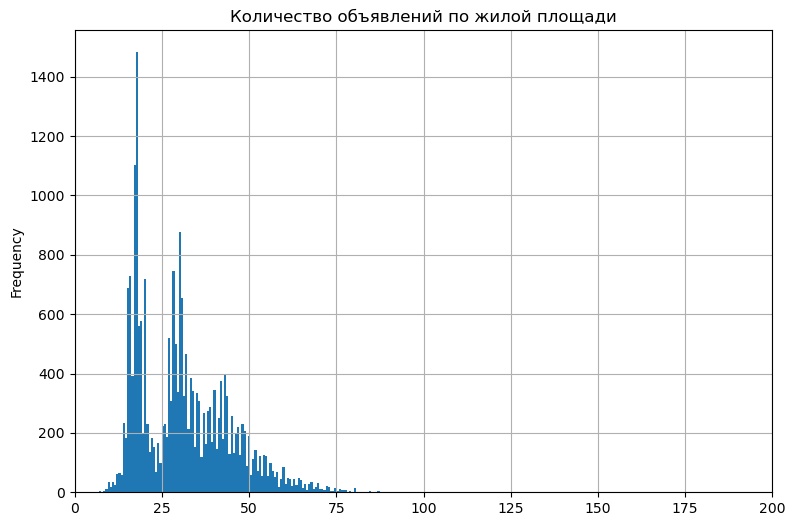

In [36]:
# Построение гистограммы по данным из столбца living_area
data['living_area'].plot(kind='hist', title='Количество объявлений по жилой площади', bins=160, xlim=(0,200), grid=True, figsize=(9,6))

Гистаграмма имеет вид распределения Пуассона. Смущает небольшое падение в районе 25 кв.м., и в результате этого 2 пика вокруг него. Есть аномальные маленькие значения, а так же как и в общей площади есть огромные значения больше 300 кв.м. Среднее арифметическое значение и медианное значение почти идентичные, 31 и 30 кв.м. соответственно. 

Возможно, что пики связаны с тем, что квартиры типовые, и соответственно комнаты в них тоже схожи по метражу. Например, для однокомнатных квартир характерна жилая площадь в районе 18 кв.м., а для двухкомнатных квартир ближе к 30 кв.м. (соответсвует двум пикам на гистограмме).

Так же необходимо учитывать, что почти 10% данных были с пропущенным значением в столбце с жилой недвижимость (1865 строк), мы восстанавливали их медианными значениями на предыдущем этапе.


In [37]:
# Значение, характеризующее начало вбросов для столбца living_area
iqr_living_area_mx = iqr_parameter((data['living_area'].describe())['25%'], (data['living_area'].describe())['75%'])


IQR: 21.4
Q1 - 1.5 IQR: -13.499999999999993
Q3 + 1.5 IQR: 72.1


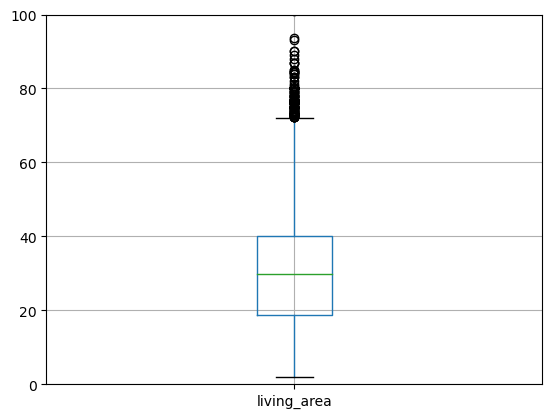

In [38]:
plt.ylim(0, 100)

data.boxplot(column='living_area')
plt.show()

Анализ диаграммы размаха показал, что жилая площадь квартиры выше 72 кв.м. - выбросы.

In [39]:
print(
    'Выбросов в столбце `living_area`:{:.0%}'
    .format(
        (data.query('living_area > 72')['living_area'].count())/(data['living_area'].describe())['count']
    )
)

Выбросов в столбце `living_area`:1%


Таких данных получилось не много, удалим их, чтобы в дальнейшем они не мешали при анализе.

In [40]:
# Удаляем записи со значением поля living_area больше, чем 72 кв.м.
data = data.query('living_area <= 72')


**4.3. Анализ данных по столбцу `kitchen_area` - площадь кухни в квартире**


In [41]:
# Список основных статистических характеристик данных по числовому столбцу kitchen_area
data['kitchen_area'].describe()

count    22187.000000
mean         9.748406
std          4.270719
min          1.300000
25%          7.000000
50%          9.000000
75%         11.100000
max         55.700000
Name: kitchen_area, dtype: float64

<Axes: title={'center': 'Количество объявлений по площади кухни'}, ylabel='Frequency'>

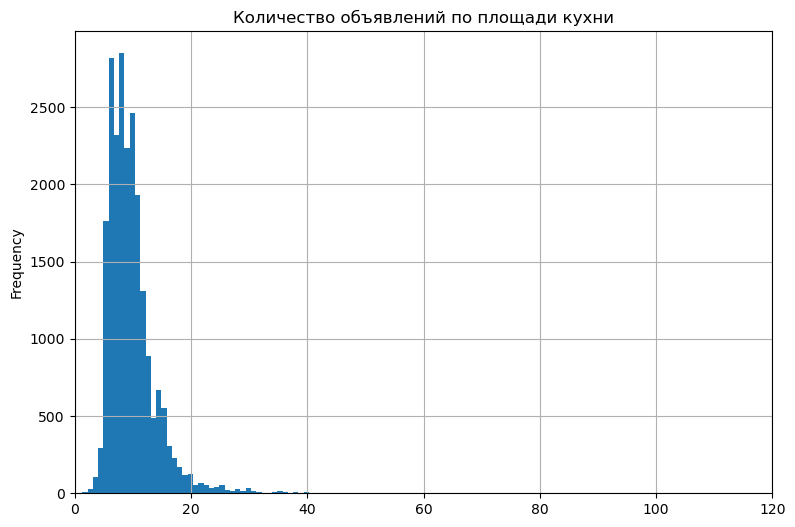

In [42]:
# Построение гистограммы по данным из столбца kitchen_area
data['kitchen_area'].plot(kind='hist', title='Количество объявлений по площади кухни', bins=60, xlim=(0,120), grid=True, figsize=(9,6))

Гистаграмма имеет вид распределения Пуассона. Присутствуют анамальные маленькие значения, а так же как и в общей площади есть огромные значения больше 100 кв.м. Среднее арифметическое значение и медианное значение почти идентичные, 10 и 9 кв.м. соответственно. 

Так же необходимо учитывать, что почти 10% данных были с пропущенным значением в столбце с жилой недвижимость (2222 строк), мы восстанавливали их медианными значениями на предыдущем этапе.

In [43]:
# Значение, характеризующее начало вбросов для столбца kitchen_area
iqr_kitchen_area_mx = iqr_parameter((data['kitchen_area'].describe())['25%'], (data['kitchen_area'].describe())['75%'])


IQR: 4.1
Q1 - 1.5 IQR: 0.8500000000000005
Q3 + 1.5 IQR: 17.25


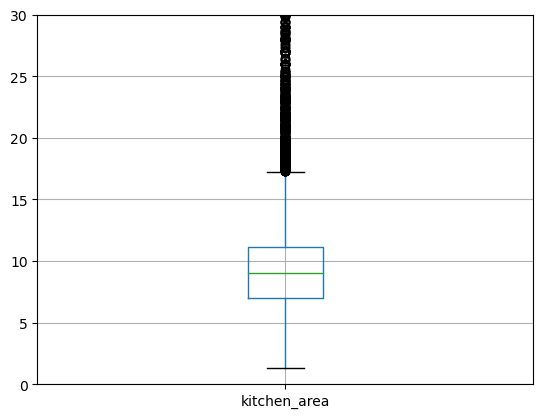

In [44]:

plt.ylim(0, 30)

data.boxplot(column='kitchen_area')
plt.show()

Анализ диаграммы размаха показал, что жилая площадь квартиры выше 17.25 кв.м. - выбросы.

In [45]:
print(
    'Выбросов в столбце `kitchen_area`:{:.0%}'
    .format(
        (data.query('kitchen_area > 17.25')['kitchen_area'].count())/(data['kitchen_area'].describe())['count']
    )
)

Выбросов в столбце `kitchen_area`:5%


Таких данных получилось не много, удалим их, чтобы в дальнейшем они не мешали при анализе.

In [46]:
# Удаляем записи со значением поля kitchen_area больше, чем 17.25 кв.м.
data = data.query('kitchen_area <= 17.25')


**4.4. Анализ данных по столбцу `last_price` - цена квартиры**


In [47]:
# Список основных статистических характеристик данных по числовому столбцу last_price
data['last_price'].describe()

count    2.118100e+04
mean     5.004619e+06
std      2.860351e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      5.995000e+06
max      4.800000e+07
Name: last_price, dtype: float64

<Axes: title={'center': 'Количество объявлений по цене'}, ylabel='Frequency'>

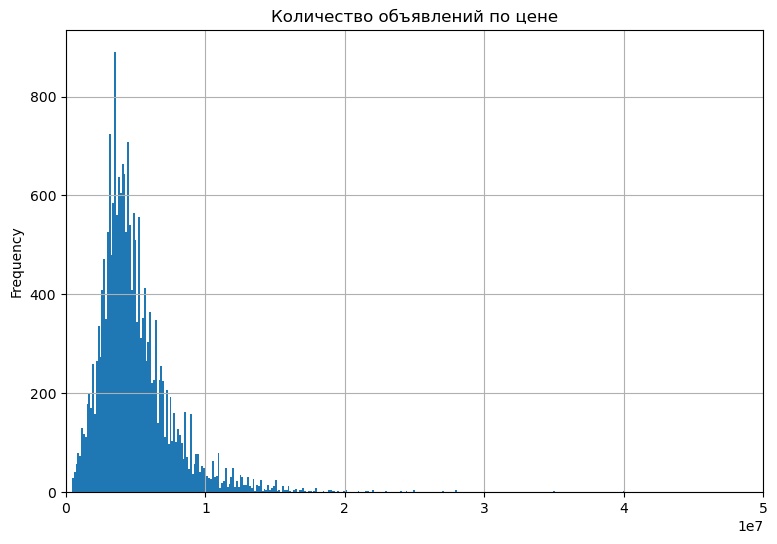

In [48]:
# Построение гистограммы по данным из столбца last_price
data['last_price'].plot(kind='hist', title='Количество объявлений по цене', bins=360, xlim=(0,50000000), grid=True, figsize=(9,6))

Гистаграмма имеет вид распределения Пуассона. Присутствуют маленькие значения, но это не нулевые данные. Так же есть и огромные значения, очевидно для квартир с огромными площадями. Среднее арифметическое значение и медианное значение сильно отличаются, 5 млн. рублей и 4,4 мил. рублей соотвественно, потому что на среднее очень влияет большое количество огромных значений.

Посмотрим диаграмму размаха, чтобы оценить возможные вбросовые значения

In [49]:
# Значение, характеризующее начало вбросов для столбца last_price
iqr_last_price_mx = iqr_parameter((data['last_price'].describe())['25%'], (data['last_price'].describe())['75%'])


IQR: 2695000.0
Q1 - 1.5 IQR: -742500.0
Q3 + 1.5 IQR: 10037500.0


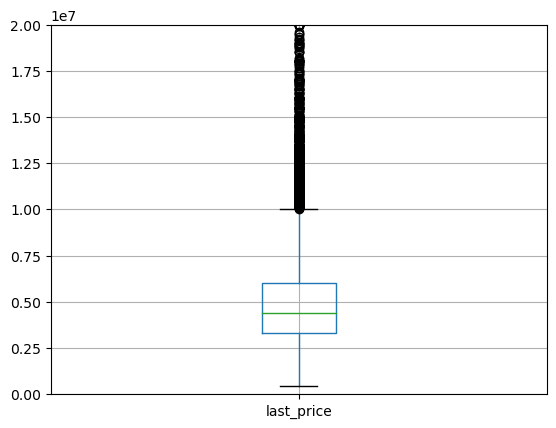

In [50]:
plt.ylim(0, 20000000)

data.boxplot(column='last_price')
plt.show()

Анализ диаграммы размаха показал, что цена выше 10037500 рублей - выбросы, данные так же не удаляем, оствляем все данные как есть.

In [51]:
print(
    'Выбросов в столбце `last_price`:{:.0%}'
    .format(
        (data.query('last_price > 10037500')['last_price'].count())/(data['last_price'].describe())['count']
    )
)

Выбросов в столбце `last_price`:5%


Таких данных получилось не много, удалим их.

In [52]:
# Удаляем записи со значением поля last_price больше, чем 10037500 рублей
data = data.query('last_price <= 10037500')


**4.5. Анализ данных по столбцу `rooms` - число комнат**


In [53]:
# Список основных статистических характеристик данных по числовому столбцу last_price
data['rooms'].describe()

count    20145.000000
mean         1.880417
std          0.874494
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<Axes: title={'center': 'Количество объявлений по количеству комнат'}, ylabel='Frequency'>

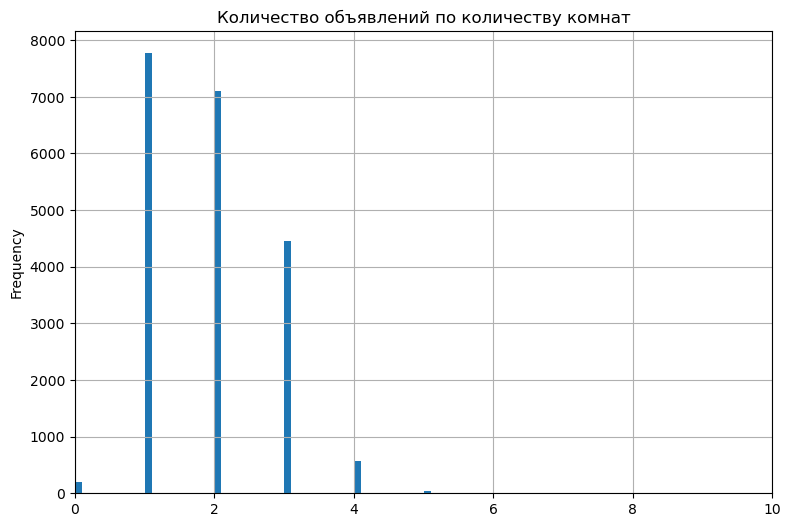

In [54]:
# Построение гистограммы по данным из столбца rooms
data['rooms'].plot(kind='hist', title='Количество объявлений по количеству комнат', bins=60, xlim=(0,10), grid=True, figsize=(9,6))


Рассмотрим подозрительные значения данных в районе 0. Выведем на экран цену, населенный пункт, общую и жилую площади, для таких квартир, у которых указано 0 комнат.

In [55]:
# Анализ данных со значением rooms = 0
data.loc[(data['rooms'] == 0), ['last_price', 'total_area', 'living_area', 'locality_name']]

,last_price,total_area,living_area,locality_name
144,2450000.0,27.00,15.500000,поселок Мурино
349,2320000.0,25.00,17.000000,деревня Кудрово
440,2480000.0,27.11,24.750000,Санкт-Петербург
508,3375000.0,34.40,24.300000,поселок Парголово
608,1850000.0,25.00,14.204545,поселок Шушары
...,...,...,...,...
23210,3200000.0,26.00,18.000000,Санкт-Петербург
23442,2500000.0,27.70,18.000000,поселок Мурино
23554,3350000.0,26.00,14.772727,Санкт-Петербург
23592,1450000.0,29.00,18.000000,Никольское


Все эти записи похожи на обычные объявления, нет никаких аномалий. Судя по площади похоже, что это студии. Оставим данные как есть без изменений с нулевым значением поля.

График выглядит очень достоверно - распредение Пуассона, больше всего в продаже однокомнатных и двухкомнатных квартир - наша гипотеза подтвердилась. Есть несколько высокий значений, когда количество комнат больше 10, но проверить достоверность такой информации не представляется возможным, оставляем эти данные в исходном виде без изменений. 

In [56]:
# Значение, характеризующее начало вбросов для столбца rooms
iqr_rooms_mx = iqr_parameter((data['rooms'].describe())['25%'], (data['rooms'].describe())['75%'])


IQR: 2.0
Q1 - 1.5 IQR: -2.0
Q3 + 1.5 IQR: 6.0


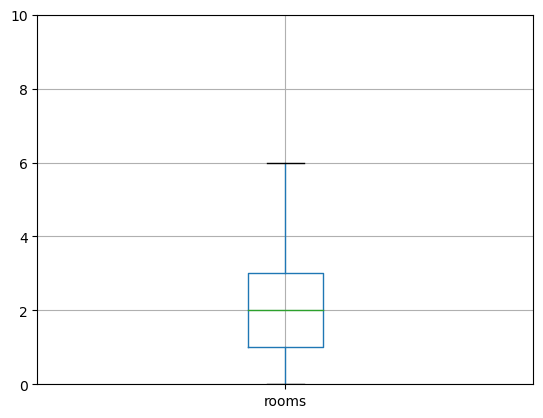

In [57]:
plt.ylim(0, 10)

data.boxplot(column='rooms')
plt.show()

Анализ диаграммы размаха показал, что количество комнат в квартире больше 6 - выбросы, но удалять нечего, максимальное значение как раз 6.

**4.6. Анализ данных по столбцу `ceiling_height` - высота потолков в м**


In [58]:
# Список основных статистических характеристик данных по числовому столбцу ceiling_height
data['ceiling_height'].describe()

count    20145.000000
mean         2.664589
std          0.209008
min          2.000000
25%          2.580000
50%          2.650000
75%          2.650000
max         14.000000
Name: ceiling_height, dtype: float64

In [59]:
# Поиск минимального, максимального и количества значений в поле ceiling_height
data['ceiling_height'].agg(['count','min', 'max'])

count    20145.0
min          2.0
max         14.0
Name: ceiling_height, dtype: float64

<Axes: title={'center': 'Количество объявлений по высоте потолка'}, ylabel='Frequency'>

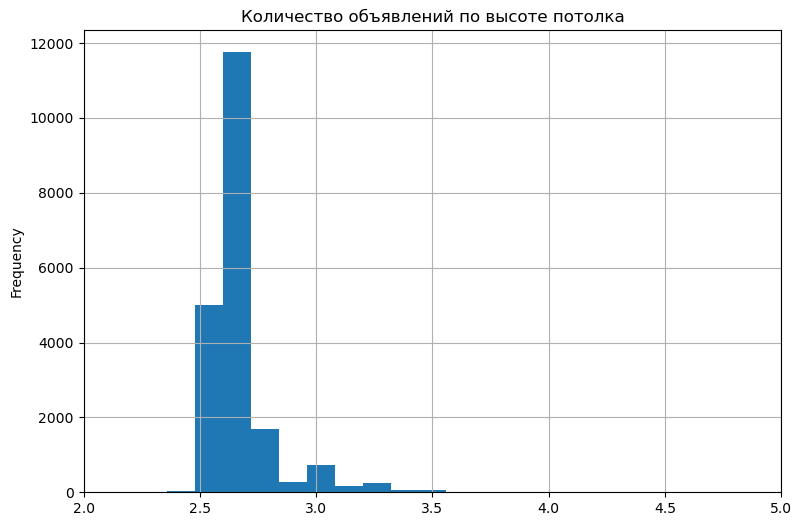

In [60]:
# Построение гистограммы по данным из столбца ceiling_height
data['ceiling_height'].plot(kind='hist', title='Количество объявлений по высоте потолка', bins=100, xlim=(2,5), grid=True, figsize=(9,6))

Анализ данных столбца `ceiling_height` мы производили на предыдушем этапе работы - "2  Предобработка данных". 

При анализе пропущенных значений было выявлено, что почти половина объявлений в таблицы не имеет значения в столбце `ceiling_height`. 

Помимо пустых значений так же были выявлены аномально низкие и высокие значения. Объявления со значениями меньше 2х метров были удалены из таблицы. Для объявлений со значением больше 20 обновлено значение столбца `ceiling_height`, как значение поделеное на 10, потому что было похоже на ошибку ввода данных, при которых потерялась точка (25 метров это 2.5 метра).

После удаления и преобразования аномальностей все пустые значения были заменены медианным `ceiling_height` среди всех записей в таблице.

Гистограмма значений столбца `ceiling_height` тоже выглядит вполне корректно, и похожа на распределение Пуассона.


In [61]:
# Значение, характеризующее начало вбросов для столбца ceiling_height
iqr_ceiling_height_mx = iqr_parameter((data['ceiling_height'].describe())['25%'], (data['ceiling_height'].describe())['75%'])


IQR: 0.06999999999999984
Q1 - 1.5 IQR: 2.4750000000000005
Q3 + 1.5 IQR: 2.755


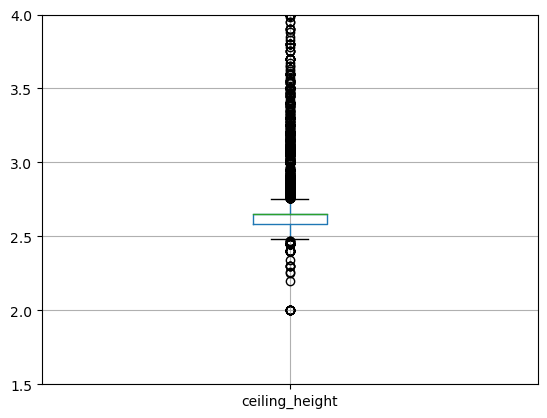

In [62]:
plt.ylim(1.5, 4)

data.boxplot(column='ceiling_height')
plt.show()

Анализ диаграммы размаха показал, что высота потолков больше, чем 2.72 - выбросы, но удалять данные не будем, оствляем все данные как есть.

Стоит заметить, что мы восстановили много пустых данных медианным значением еще на в процессе предобработки данных.

**4.7. Анализ данных по столбцу `floor_type` - тип этажа дома**

Значения в этом поле не числовые, поэтому построим круговую диаграмму. Чтобы оценить долю значений в общей выборке.

<Axes: title={'center': 'Количество объявлений по типу этажа квартиры'}, ylabel='count'>

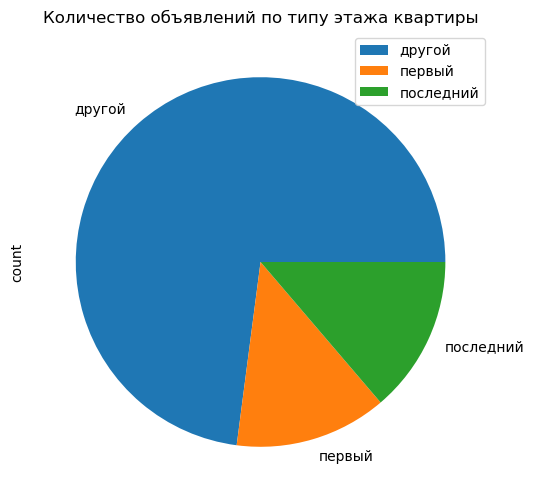

In [63]:
# Построение гистограммы по данным из столбца floor_type
data.groupby('floor_type')['floor_type'].agg(['count']).plot(y='count', title='Количество объявлений по типу этажа квартиры', kind='pie', figsize=(9,6))


In [64]:
# Знаечний в поле floor_type по популярности
print(data['floor_type'].value_counts().head(5))

floor_type
другой       14693
последний     2769
первый        2683
Name: count, dtype: int64


Категория "другой" лидирует в рейтинге типа этажа. Объявлений с квартирами на последнем этаже больше, чем квартир на первом. 

**4.8. Анализ данных по столбцу `floor` - этаж квартиры**


In [65]:
# Список основных статистических характеристик данных по числовому столбцу floor
data['floor'].describe()

count    20145.000000
mean         5.834301
std          4.852147
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<Axes: title={'center': 'Количество объявлений этажу квартиры'}, ylabel='Frequency'>

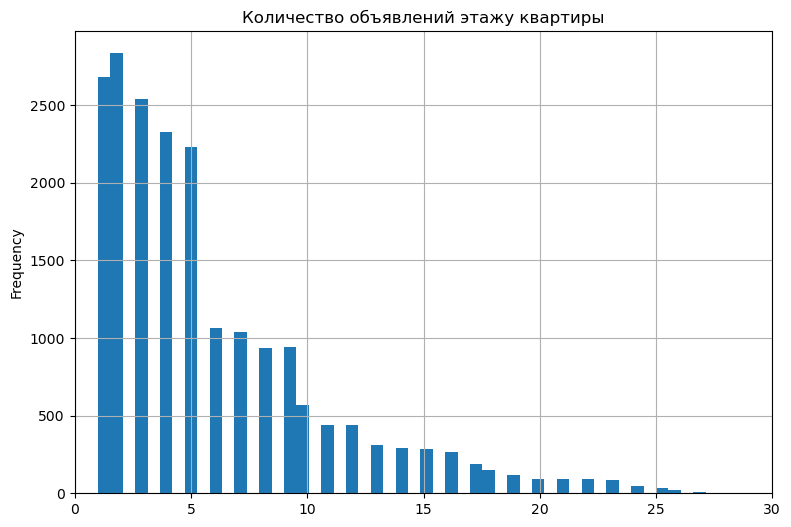

In [66]:
# Построение гистограммы по данным из столбца floor
data['floor'].plot(kind='hist', title='Количество объявлений этажу квартиры', bins=60, xlim=(0,30), grid=True, figsize=(9,6))

Распределение значений соотвествует распределению Пуассона. Чаще всего встречаются объявления на 2-8 этажах квартиры.

**4.9. Анализ данных по столбцу `floors_total` - общее количество этажей в доме**


<Axes: title={'center': 'Количество объявлений по этажности дома'}, ylabel='Frequency'>

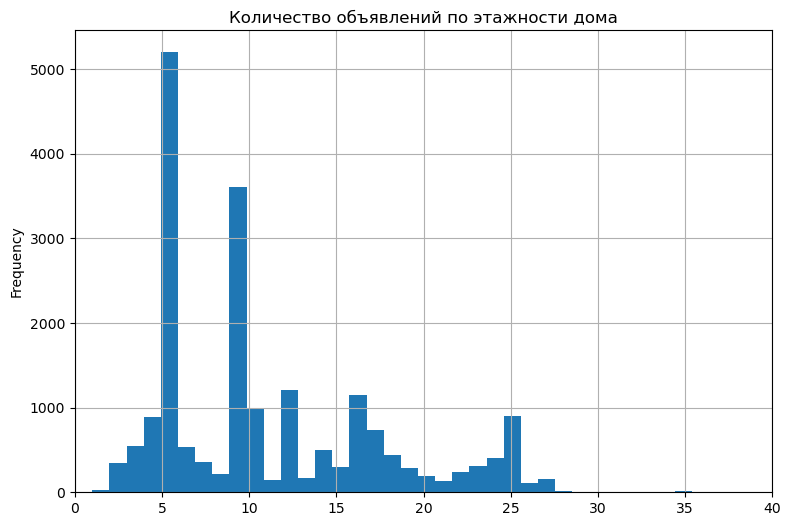

In [67]:
# Построение гистограммы по данным из столбца floors_total
data['floors_total'].plot(kind='hist', title='Количество объявлений по этажности дома', bins=60, xlim=(0,40), grid=True, figsize=(9,6))

In [68]:
# Список основных статистических характеристик данных по числовому столбцу floors_total
data['floors_total'].describe()

count    20145.000000
mean        10.705684
std          6.573370
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [69]:
# Пять максимально популярных знаечний в поле floors_total
print(data['floors_total'].value_counts().head(5))

floors_total
5     5197
9     3608
12    1208
16    1153
10     998
Name: count, dtype: int64


Гистограмма по столбцу `floors_total` выглядит не очень красиво, есть 2 пика примерно в 5 и 10 этажей, среднее значение среди этажностей - 10, медианное значение - 9 (как раз там есть второй небольшой пик значений).

Но в целом данные выглядят очень правдоподобно, 5-тиэтажки и 9-тиэтажки самые популярные городские строения.

**4.10. Анализ данных по столбцу `city_centers_nearest` - расстроение до города в м**


In [70]:
# Список основных статистических характеристик данных по числовому столбцу city_centers_nearest
data['city_centers_nearest'].describe()

count    14885.000000
mean     15287.067316
std       8487.505318
min        208.000000
25%      10948.000000
50%      13833.000000
75%      16804.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<Axes: title={'center': 'Количество объявлений по расстоянию до центра СПб'}, ylabel='Frequency'>

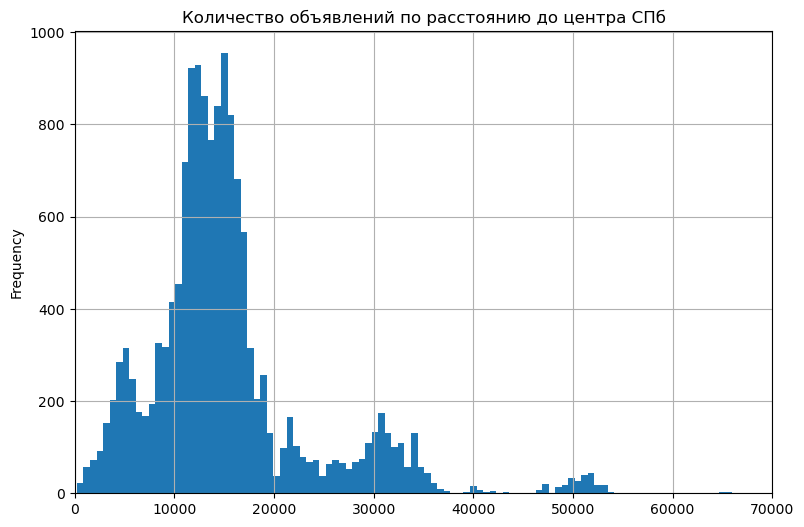

In [71]:
# Построение гистограммы по данным из столбца city_centers_nearest
data['city_centers_nearest'].plot(kind='hist', title='Количество объявлений по расстоянию до центра СПб', bins=100, xlim=(0,70000), grid=True, figsize=(9,6))


В среднем квартиры находятся на растоянии в 13 км от центра Санкт-Петербурга - это медианное значение, на графике этот пик очень заметен. Среднее значение соответствует 8,5 км. Ну и в целом, при беглом взгляде на график можно увидеть 2 пика.
Такая картина связана с тем, что в таблице присутствуют 2 типа объявлений о продаже квартир: в Санкт_Петербурге и в соседних населенных пунктах. Каждая группа дает своей локальный пик данных.

Так же при анализе данного поля необходимо учитывать, что половина объявлений была с пустым значением.

**4.11. Анализ данных по столбцу `parks_nearest` - расстроение до ближайшего парка в м**


In [72]:
# Список основных статистических характеристик данных по числовому столбцу parks_nearest
data['parks_nearest'].describe()

count    6047.000000
mean      486.687944
std       322.270362
min         1.000000
25%       290.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: title={'center': 'Количество объявлений по расстоянию до парка'}, ylabel='Frequency'>

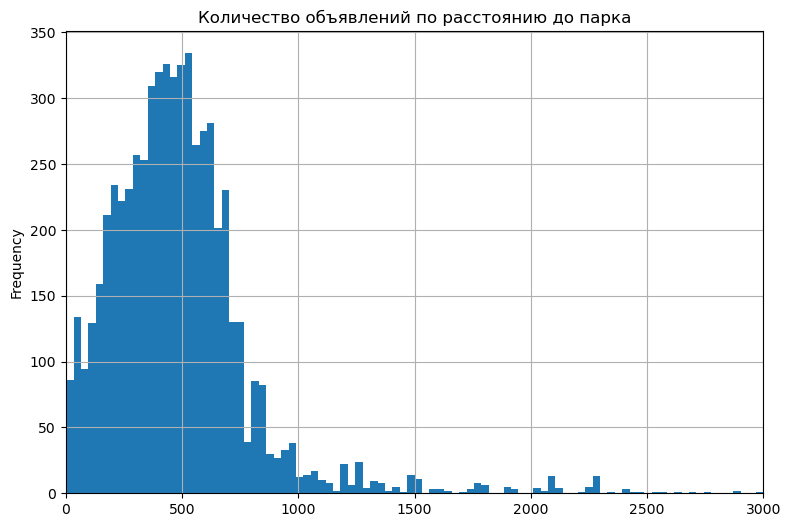

In [73]:
# Построение гистограммы по данным из столбца parks_nearest
data['parks_nearest'].plot(kind='hist', title='Количество объявлений по расстоянию до парка', bins=100, xlim=(0,3000), grid=True, figsize=(9,6))

Распределение значений соотвествует распределению Пуассона. Чаще всего парк находится в радиусе 460 метров от квартиры.

Так же при анализе данного поля необходимо учитывать, что много объявлений была с пустым значением.

**4.12. Анализ данных по столбцу `airports_nearest` - расстроение до ближайшего аэропорта в м**


In [74]:
# Список основных статистических характеристик данных по числовому столбцу airports_nearest
data['airports_nearest'].describe()

count    14834.000000
mean     28975.743899
std      13112.826143
min          0.000000
25%      17840.250000
50%      27271.000000
75%      37967.500000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: title={'center': 'Количество объявлений по расстоянию до аэропорта'}, ylabel='Frequency'>

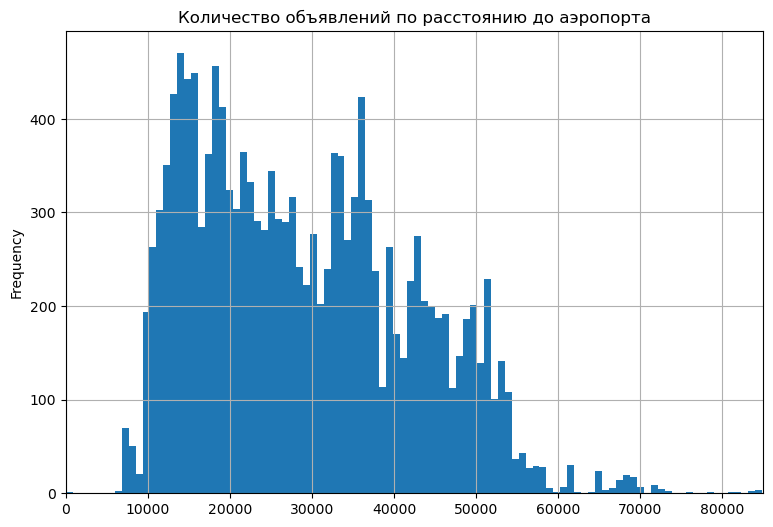

In [75]:
# Построение гистограммы по данным из столбца airports_nearest
data['airports_nearest'].plot(kind='hist', title='Количество объявлений по расстоянию до аэропорта', bins=100, xlim=(0,85000), grid=True, figsize=(9,6))

Распределение значений соотвествует распределению Пуассона. В среднем расстояние от квартиры до аэропорта составляет 27-29 км.

Так же при анализе данного поля необходимо учитывать, что много объявлений была с пустым значением.

**4.13. Анализ данных по столбцу `first_day_exposition` - дата публикации объявления**


<Axes: title={'center': 'Количество объявлений по дням недели'}, xlabel='День недели', ylabel='Количество объявлений'>

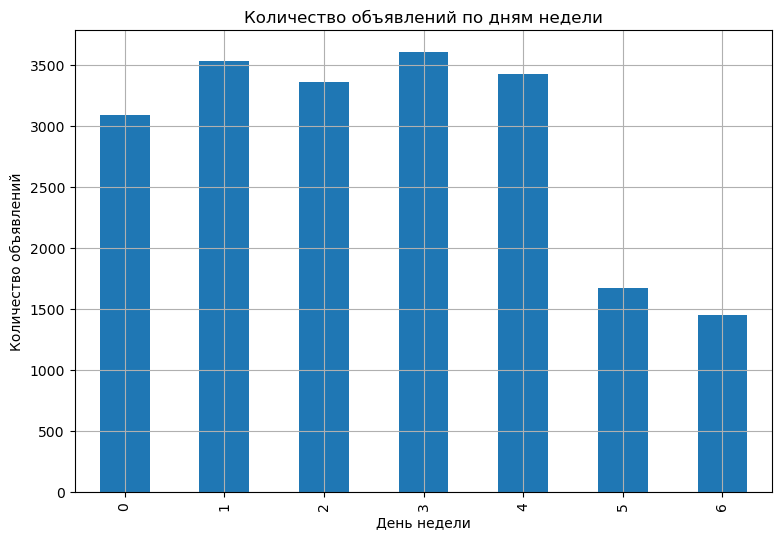

In [76]:
# Построение гистограммы по данным из столбца day_week_exposition
(
    data
    .groupby('day_week_exposition')['day_week_exposition']
    .agg(['count'])
    .plot(y='count', xlabel='День недели', ylabel='Количество объявлений', legend=False, kind='bar', figsize=(9,6), grid=True, title='Количество объявлений по дням недели')
)


<Axes: title={'center': 'Количество объявлений по месяцам'}, xlabel='Месяц', ylabel='Количество объявлений'>

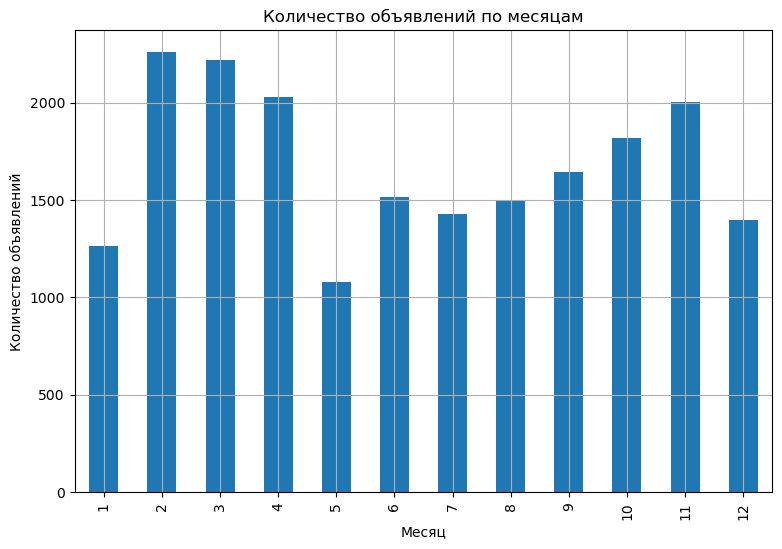

In [77]:
# Построение гистограммы по данным из столбца month_exposition
(
    data
    .groupby('month_exposition')['month_exposition']
    .agg(['count'])
    .plot(y='count', xlabel='Месяц', ylabel='Количество объявлений', legend=False, kind='bar', figsize=(9,6), grid=True, title='Количество объявлений по месяцам')
)


Анализ даты публикаций показал, что чаще всего объявления публикуют в будние дни со вторника по пятницу, в выходные публикаций меньше почти в 2 раза. Самые активные месяцы публикаций: февраль, март, апрель и ноябрь.

**Задание 1. Анализ данных по столбцу `days_exposition` - как быстро продавались квартиры**


In [78]:
# Список основных статистических характеристик данных по числовому столбцу day_exposition
data['days_exposition'].describe()

count    17750.000000
mean       169.009803
std        206.389150
min          1.000000
25%         43.000000
50%         89.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: ylabel='Frequency'>

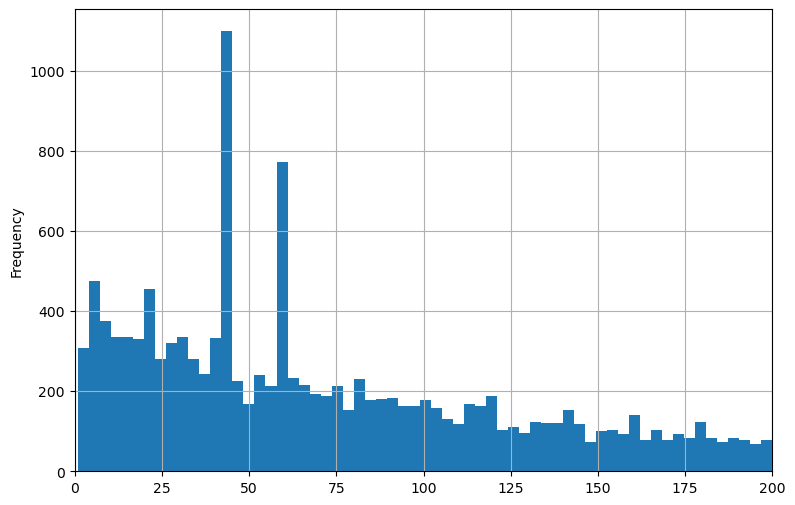

In [79]:
# Построение гистограммы по данным из столбца days_exposition
data['days_exposition'].plot(kind='hist', bins=500, xlim=(0,200), grid=True, figsize=(9,6))

In [80]:
# Список возможных значений в поле days_exposition
data['days_exposition'].value_counts().head()

days_exposition
45.0    868
60.0    508
7.0     217
30.0    189
4.0     157
Name: count, dtype: int64

Среднее арифметическое и медианное значения равны соотвествено 180 и 95 дней (6 и 3 месяца). На среднее значение влияют объявления, которые долго высели в продаже, прежде чем их закрыли.

Судя по гистограмме чаще всего объявления закрывались в течении первых 3 месяцев. И чем долше весит объявление, тем меньше ими интересуются.

Есть страные пики в районе 45 и 60 дней (так же еще в частых значениях фигурируют 30 и 90 дней), возможно это какой-то бесплатный период публикации объявлений на Яндекс.Недвиджимости. Необходима консультация специалиста.

Быстрыми можно считатать такие продажи, в которых объявление было снято с публикации меньше, чем за 45 дней (первый квартиль). Долгими, когда объявление было снято с публикации позже, чем 231 день (третий квартиль).

**Задание 2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**


0.66

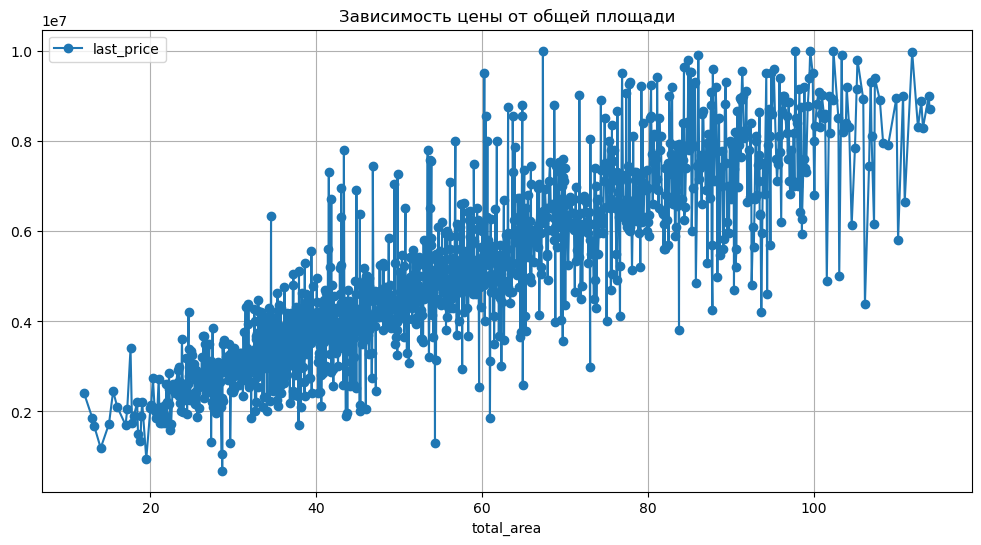

In [81]:
# Коэффициент Пирсона - коэффициент корреляции
display(round(data['total_area'].corr(data['last_price']), 2))

# Построение сводной таблицы и графика зависимости last_price от total_area
data_stat = (
    data
    .pivot_table(index='total_area',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость цены от общей площади', style='o-', figsize=(12,6))
)


Коэффициент корреляции - 0.67 - средняя линейная зависимость. И график показывает, что с увеличением общей площади квартиры, цена квартиры тоже увеличивается.

0.54

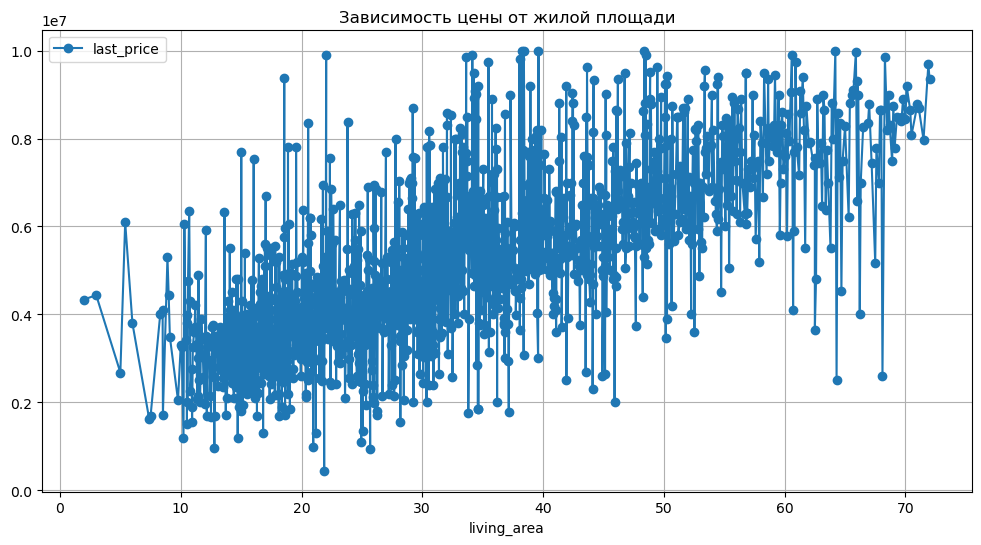

In [82]:
# Коэффициент Пирсона - коэффициент корреляции
display(round(data['living_area'].corr(data['last_price']), 2))

# Построение сводной таблицы и графика зависимости last_price от total_area
data_stat = (
    data
    .pivot_table(index='living_area',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость цены от жилой площади', style='o-', figsize=(12,6))
)


Коэффициент корреляции - 0.54 - средняя линейная зависимость. Но в целом график показывает, что с увеличением жилой площади квартиры, цена квартиры тоже немного увеличивается.

0.47

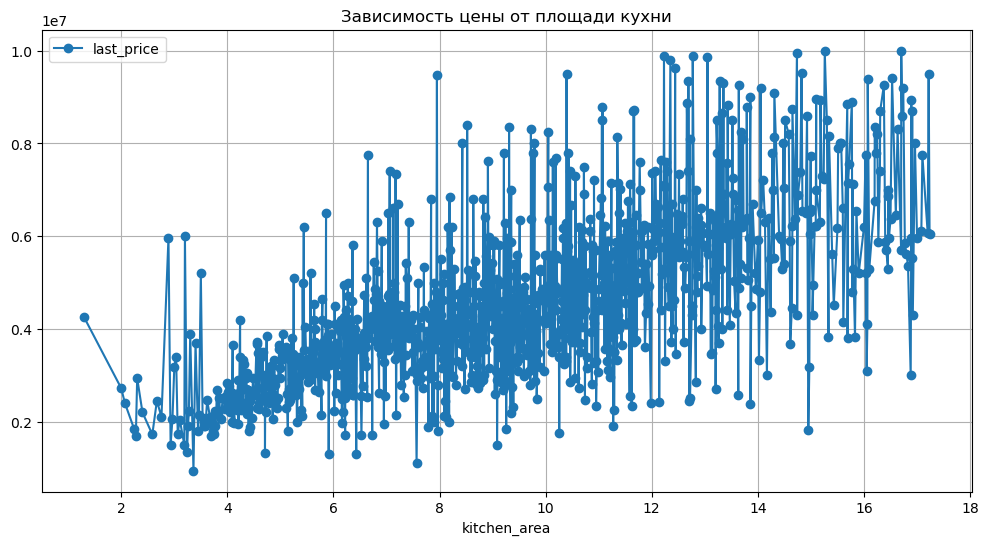

In [83]:
# Коэффициент Пирсона - коэффициент корреляции
display(round(data['kitchen_area'].corr(data['last_price']), 2))

# Построение сводной таблицы и графика зависимости last_price от kitchen_area
data_stat = (
    data
    .pivot_table(index='kitchen_area',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость цены от площади кухни', style='o-', figsize=(12,6))
)


Коэффициент корреляции - 0.47 - слабая линейная зависимость. Но в целом график показывает, что с увеличением площади кухни квартиры, цена квартиры тоже немного увеличивается. 

Вероятнее всего на стоимость квартиры не влияет сама площадь кухни, просто она в среднем зависит/пропорциональна общей площади всей квартиры.

0.4184174835708496

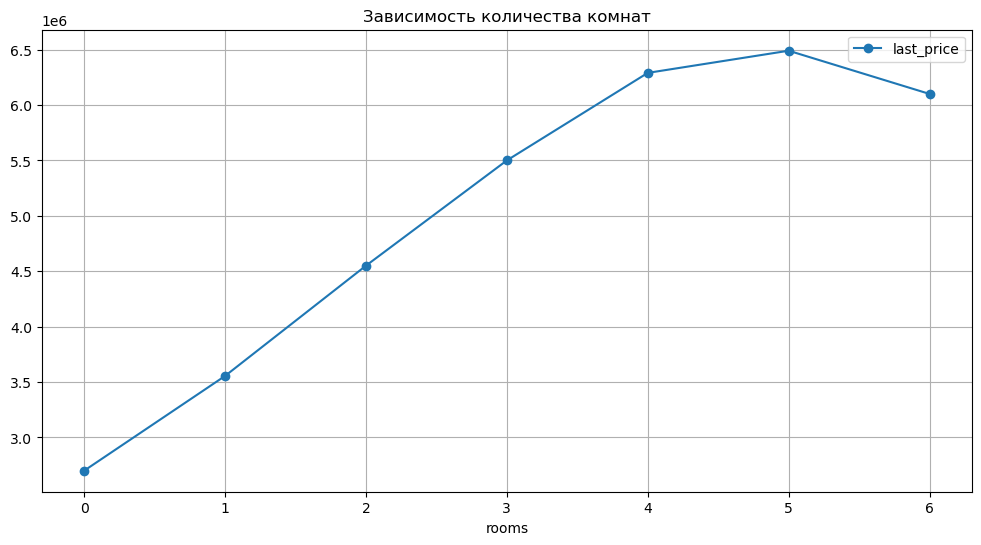

In [84]:

# Коэффициент Пирсона - коэффициент корреляции
display(data['rooms'].corr(data['last_price']))

# построение сводной таблицы и графика зависимости last_price от data_rooms
data_stat = (
    data
    .pivot_table(index='rooms',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость количества комнат', style='o-', figsize=(12,6))
)


Коэффициент корреляции - 0.41 - слабая линейная зависимость. Но в целом график показывает, что с увеличением количества комнат в квартире, цена квартиры тоже увеличивается.

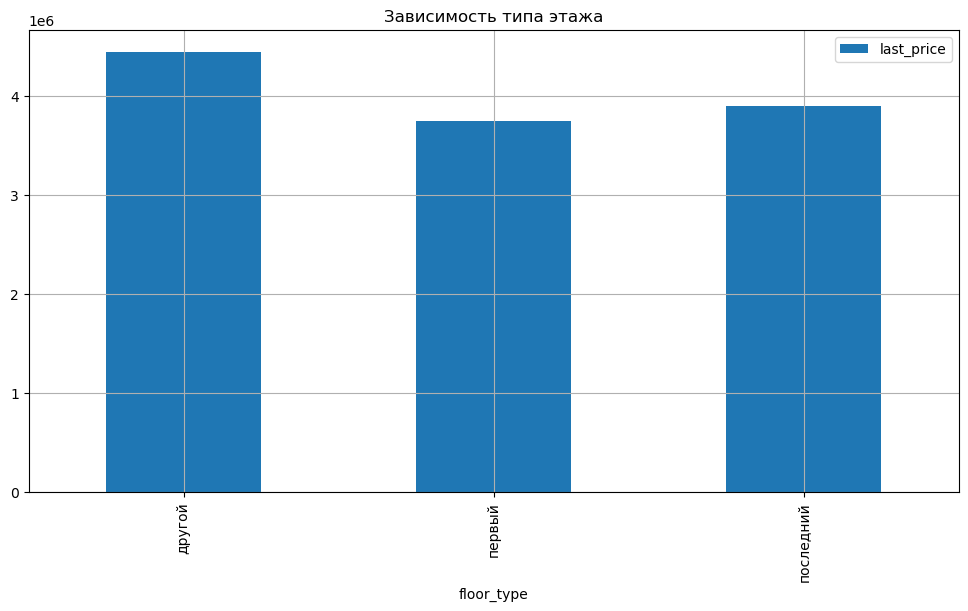

In [85]:
# Построение сводной таблицы и графика зависимости last_price от floor_type
data_stat = (
    data
    .pivot_table(index='floor_type',values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, title='Зависимость типа этажа', style='o-', figsize=(12,6))
)


По графику видно, что цена у квартир НЕ на крайних этажах выше. При этом квартира на первом этаже стоит дешевле, чем квартира на последнем.

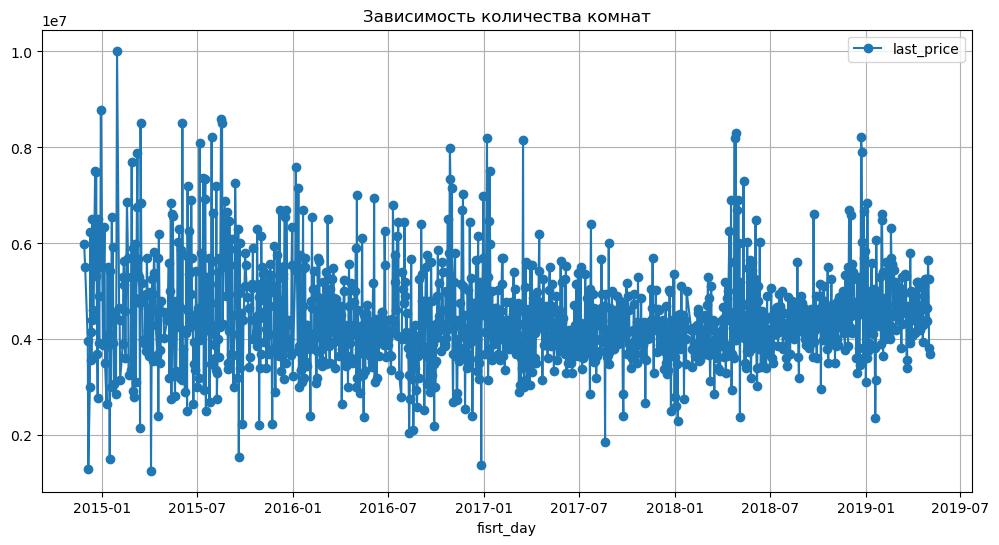

In [86]:
# Создали столбец для даты без времени
data['fisrt_day'] = pd.to_datetime(data['first_day_exposition']).dt.date

# Построение сводной таблицы и графика зависимости last_price от fisrt_day
data_stat = (
    data
    .pivot_table(index='fisrt_day',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость количества комнат', style='o-', figsize=(12,6))
)


По графику не видно никакой линейной зависимости стоимости квартиры от даты публикации объявления.


Вывод: на стоимость квартиры влияет общая площадь квартиры, коэффициент корреляции средний. Так же дороже стоят квартиры, не на первом и не на последнем этаже. Количество комнат и дата публикации при продаже особой роли не играет.

**Задание 3. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [87]:
# Список из 10 населенных пунктов, в которых больше всего объявлений
locality = data['locality_name'].value_counts().head(10)

# Построение сводной таблицы средняя цена кв.м. и количество объявлений по населеднным пунктам
data_stat = (
    data
    .query('locality_name in @locality.index')
    .pivot_table(index='locality_name',values='price_to_metre', aggfunc=['median', 'count'])
)
# Изменение названий столбцов
data_stat.columns = ['median','count']


data_stat.sort_values(by='median', ascending = False)

,median,count
locality_name,,
Санкт-Петербург,101219.510,12570
Пушкин,97725.710,318
поселок Парголово,92282.050,313
деревня Кудрово,92225.050,276
поселок Мурино,86111.110,535
поселок Шушары,76829.270,429
Колпино,74689.875,328
Гатчина,67671.510,300
Всеволожск,65538.630,380


Вывод: населенным пунктом с самой высокой ценой за кв.м. является Санкт-Петербург, населенным пунктом с самой низкой ценой за кв.м. - Выборг

**Задание 4. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

-0.32

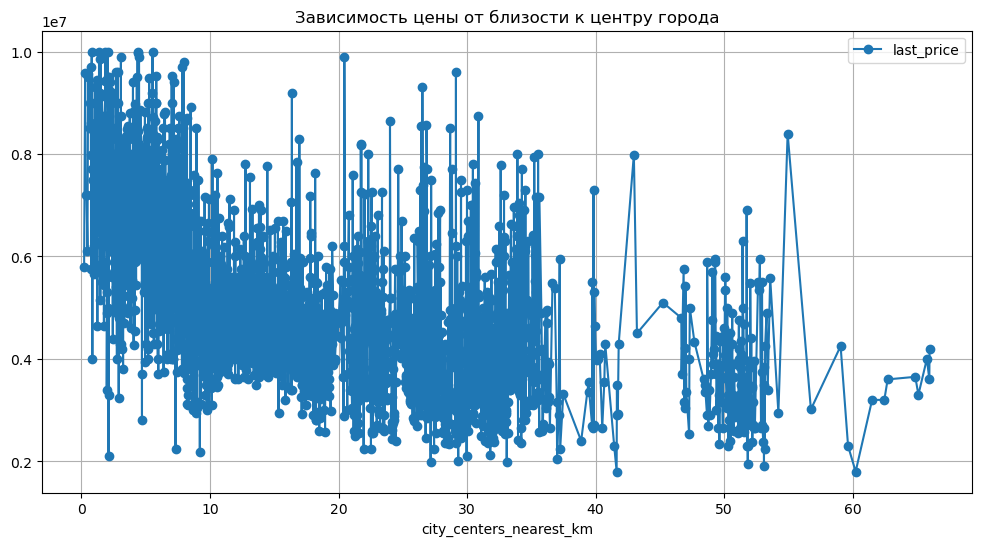

In [88]:
# Срез, только квартиры Санкт-Петербурга
data_spb = data.query('locality_name == "Санкт-Петербург"')

# Коэффициент Пирсона - коэффициент корреляции
display(round(data_spb['city_centers_nearest_km'].corr(data_spb['last_price']),2))

# Построение сводной таблицы и графика зависимости last_price от city_centers_nearest_km
data_stat = (
    data
    .pivot_table(index='city_centers_nearest_km',values='last_price', aggfunc='median')
    .plot(grid=True, title='Зависимость цены от близости к центру города', style='o-', figsize=(12,6))
)


Имеется очень слабая отрицательная линейная зависимость, чем ближе к центру города, тем выше цена. Коэффициент коррекляции равен "-0.32".

### Общий вывод

В вашем распоряжении были данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет (Путь к файлу: /datasets/real_estate_data.csv).

Было необходимо провести исследовательский анализ данных, который поможет установить параметр, влияющие на цену объектов. Это позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

**Описание данных:**

| Столбец              | Название                                                       |
|----------------------|----------------------------------------------------------------|
|`airports_nearest`    |расстояние до ближайшего аэропорта в метрах (м)                 |
|`balcony`             |число балконов                                                  |
|`ceiling_height`      |высота потолков (м)                                             |
|`cityCenters_nearest` |расстояние до центра города (м)                                 |
|`days_exposition`     |сколько дней было размещено объявление (от публикации до снятия)|
|`first_day_exposition`|дата публикации                                                 |
|`floor`               |этаж                                                            |
|`floors_total`        |всего этажей в доме                                             |
|`is_apartment`        |апартаменты (булев тип)                                         |
|`kitchen_area`        |площадь кухни в квадратных метрах (м²)                          |
|`last_price`          |цена на момент снятия с публикации                              |
|`living_area`         |жилая площадь в квадратных метрах (м²)                          |
|`locality_name`       |название населённого пункта                                     |
|`open_plan`           |свободная планировка (булев тип)                                |
|`parks_around3000`    |число парков в радиусе 3 км                                     |
|`parks_nearest`       |расстояние до ближайшего парка (м)                              |
|`ponds_around3000`    |число водоёмов в радиусе 3 км                                   |
|`ponds_nearest`       |расстояние до ближайшего водоёма (м)                            |
|`rooms`               |число комнат                                                    |
|`studio`              |квартира-студия (булев тип)                                     |
|`total_area`          |общая площадь квартиры в квадратных метрах (м²)                 |
|`total_images`        |число фотографий квартиры в объявлении                          |


**Предварительный анализ и обработка данных:**

1. Переименован столбец `cityCenters_nearest` в `city_сenters_nearest`, приведен к стандартному виду.
2. Выявлены несоотвествия типов данных с фактическими значениями в некоторых столбцах, произведены преобразования:
    - `is_apartment` преобразован в `bool`;
    - `balcony` преобразован в `int`; 
    - `floors_total` преобразован в `int`.
3. Проанализированы строки с пустыми значениями в поле `balcony`. Было сделано предположение, что если это поле пустое, значит балкона в квартире нет, пустые значения заменены нулевыми значениями.
4. Проанализированы строки с пустыми значениями в поле `is_apartment`. Признак означает, является ли квартира апартментами или нет. В апартаментах нельзя прописаться и получить за них налоговый вычет, поэтому они стоят дешевле. Всем пустым значениям проставлено значение False.
5. Выявлены аномально высокие значения в поле `ceiling_height`. Было сделано предположение, что большие значения типа 25 или 32 метра это некорректно записанные в таблицу занные 2.5 м и 3.2 м. Значения свыше 20 м поделены на 10 для приведения к нормальным значениям.
6. Пустые значения в поле `ceiling_height` заменены медианными значениями по таблице (если бы в таблице был тип/серия квартиры, можно было найти медиану в рамках этого параметра).
7. Значения меньше 2 м в поле `ceiling_height` удалены.
8. Выявлены неявные дубликаты в записи населенных пунктов, стандартизировали названия, удалили неявные дубликаты.
9. Выявлено много пропущенных значений в столбцах "Жилая площадь", "Площадь кухни" - оставлены без изменений, восстановить не возможно, удалять не стоит.
10. Выявлено очень много пропущенных значений в полях с автоматическим заполнением: `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Оставлены без изменений. Была сделана попытка заменить расстояния медианными значениями в рамках населенного пункта `locality_name`, но на самом деле получилось восстановить только около 60 строк, потому что в целом `locality_name` строк с заполненными параметрами и строк с пустыми параметрами не пересекаются. Вероятнее всего значения автоматически проставляются для ограниченного набора гео-локаций.
11. Удалены строки, в которых встречались пустые значения в полях `locality_name`, `floors_total`.
12. Удалены явные дубликаты в таблице.

Сервису стоит обратить внимание на большое количество пропущенных данных, проблемы могли произойти, как при заполнении, так и при хранении и получении данных. Особое внимание стоит обратить на поля, заполняющиеся автоматически по гео-позиции.

**В таблицу были добавлены новые столбцы со следующими параметрами:**

| Столбец                  | Назначение                                                              |
|--------------------------|-------------------------------------------------------------------------|
| `price_to_metre`         | цена одного квадратного метра                                           |
| `day_week_exposition`    | день недели публикации объявления (0 - понедельник, 1 - вторник и т.д.) |
| `month_exposition`       | месяц публикации объявления                                             |
| `year_exposition`        | год публикации объявления                                               |
| `floor_type`             | тип этажа квартиры (значения - "первый", "последний" и "другой")        |
| `city_centers_nearest_km`| расстояние до центра города в километрах                                |


**Исследовательский анализ данных**

Были проанализорованы некоторые параметры для выявления аномальных значений и вбросов.
        
***Общая площадь***

Есть аномальные маленькие значения, а так же есть огромные значения больше 300 кв.м. (максимальное значение - 900 кв.м.). Среднее арифметическое и медианное значения примерно похожи, 60 кв.м. и ***52 кв.м.*** соответственно. На среднее значение очень влияют квартиры с огромным метражом.

По имеющимся данным можно предположить, что самые популярые в продаже квартиры ***двухкомнатные*** или ***однокомнатные***, анализ статистики по количеству комнат в картире это подтвердил.

Анализ диаграммы размаха показал, что общая площадь квартиры выше 114 кв.м. - выбросы, такие объявления были удалены.

***Жилая площадь***

На гистрограмме по этому параметру можно увидеть небольшое падение в районе 25 кв.м., и в результате этого 2 пика вокруг него. Есть аномальные маленькие значения, а так же как и в общей площади есть огромные значения больше 300 кв.м. Среднее арифметическое значение и медианное значение почти идентичные, 31 кв.м. и ***30 кв.м.*** соответственно.

Возможно, что пики связаны с тем, что квартиры типовые, и соответственно комнаты в них тоже схожи по метражу. Например, для однокомнатных квартир характерна жилая площадь в районе 18 кв.м., а для двухкомнатных квартир ближе к 30 кв.м. (соответсвует двум пикам на гистограмме).
Так же необходимо учитывать, что почти 10% данных были с пропущенным значением в столбце с жилой недвижимость (1865 строк).

Анализ диаграммы размаха показал, что жилая площадь квартиры выше 72 кв.м. - выбросы, такие объявления были удалены.

***Площадь кухни***

Присутствуют анамальные маленькие значения, а так же как и в общей площади есть огромные значения больше 100 кв.м. Среднее арифметическое значение и медианное значение почти идентичные, 10 кв.м. и ***9 кв.м.*** соответственно.

Так же необходимо учитывать, что почти 10% данных были с пропущенным значением в столбце с жилой недвижимость (2222 строк).

Анализ диаграммы размаха показал, что жилая площадь квартиры выше 17.25 кв.м. - выбросы, такие объявления были удалены. 

***Цена объекта***

Присутствуют маленькие значения, но это не нулевые данные. Так же есть и огромные значения, очевидно для квартир с огромными площадями. Среднее арифметическое значение и медианное значение сильно отличаются, 5 млн. рублей и ***4,4 мил. рублей*** соотвественно, потому что на среднее очень влияет большое количество огромных значений.

Анализ диаграммы размаха показал, что цена выше 10 млн. рублей - выбросы, такие объявления были удалены. 

***Количество комнат***

Были проанализированы подозрительные данные с нулевым значением количества комнат. Очень похоже на ошибку ввода данных или какую-то техническую ошибка, при которой проставились 0 однокомнатным квартирам. Всем квартирам с нулевым значенимя проставлено значение "1" - однакомнатная квартира.

Согласно гистограмме больше всего в продаже ***однокомнатных и двухкомнатных квартир***. Есть несколько высокий значений, когда количество комнат больше 10, но проверить достоверность такой информации не представляется возможным.

Анализ диаграммы размаха показал, что количество комнат в квартире больше 6 - выбросы.

***Высота потолков***

Анализ данных столбца ceiling_height мы производили на предыдушем этапе работы - "Предварительный анализ и обработка данных". Медианное значение - ***2.65 м***.

Анализ диаграммы размаха показал, что высота потолков больше, чем 2.85 - выбросы.

***Тип этажа квартиры***

Категория ***"другой"*** лидирует в рейтинге типа этажа. Объявлений с квартирами на последнем этаже больше, чем квартир на первом.

***Этаж квартиры***

Согласно гистограмме чаще всего встречаются объявления на ***2-8 этажах дома***.

***Общее количество этажей в доме***

Гистограмма по столбцу floors_total выглядит не очень красиво, есть 2 пика примерно в 5 и 10 этажей, среднее значение среди этажностей - 10, медианное значение - 9 (как раз там есть второй небольшой пик значений).
Но в целом данные выглядят очень правдоподобно, ***5-тиэтажки*** и ***9-тиэтажки*** самые популярные городские строения.

***Расстояние до центра города в метрах***

В среднем квартиры находятся на растоянии в ***13 км*** от центра Санкт-Петербурга - это медианное значение, на графике этот пик очень заметен. Среднее значение соответствует 8,5 км. Ну и в целом, при беглом взгляде на график можно увидеть 2 пика. Такая картина связана с тем, что в таблице присутствуют 2 типа объявлений о продаже квартир: в Санкт_Петербурге и в соседних населенных пунктах. Каждая группа дает своей локальный пик данных.
Так же при анализе данного поля необходимо учитывать, что половина объявлений была с пустым значением.

***Расстояние до ближайшего парка***

Чаще всего парк находится в радиусе ***460 метров*** от квартиры.
Так же при анализе данного поля необходимо учитывать, что много объявлений была с пустым значением.


***Расстояние до ближайшего аэропорта***

В среднем расстояние от квартиры до аэропорта составляет ***27-29 км.***
Так же при анализе данного поля необходимо учитывать, что много объявлений была с пустым значением.

***Дата публикации объявления***

Анализ даты публикаций показал, что чаще всего объявления публикуют ***в будние дни со вторника по пятницу***, в выходные публикаций меньше почти в 2 раза. Самые активные месяцы публикаций: ***февраль, март***, апрель и ноябрь.

**Анализ скорости продажи объявления**

Среднее арифметическое и медианное значения равны соотвествено 180 и 95 дней (6 и 3 месяца). На среднее значение влияют объявления, которые долго высели в продаже, прежде чем их закрыли.
Судя по гистограмме чаще всего объявления закрывались в течении первых 3 месяцев. И чем долше весит объявление, тем меньше ими интересуются.
Есть страные пики в районе 45 и 60 дней (так же еще в частых значениях фигурируют 30 и 90 дней), возможно это какой-то бесплатный период публикации объявлений на Яндекс.Недвиджимости. Необходима консультация специалиста.
Быстрыми можно считатать такие продажи, в которых объявление было снято с публикации меньше, чем за 45 дней (первый квартиль). Долгими, когда объявление было снято с публикации позже, чем 231 день (третий квартиль).

**Анализ зависимости цены от параметров**

С увеличением общей площади квартиры, цена квартиры увеличивается.
С увеличением жилой площади квартиры, цена квартиры тоже немного увеличивается.
С увеличением площади кухни, цена квартиры тоже немного увеличивается. Вероятнее всего на стоимость квартиры не влияет сама площадь кухни, просто она в среднем зависит/пропорциональна общей площади всей квартиры.

С увеличением количества комнат, цена тоже немного увеличивается, но коэффициент корреляции слабый, зависимость не сильная, скорее всего это связано с параметром общая площадь, потому что у квартир с большим количеством комнат общая площадь все таки больше.

Цена у квартир НЕ на крайних этажах выше. При этом квартира на первом этаже стоит дешевле, чем квартира на последнем.

Никакой линейной зависимости стоимости квартиры от даты публикации объявления нет.

**Анализ зависимости от расстояния до центра города**

Имеется слабая отрицательная линейная зависимость, чем ближе к центру города, тем выше цена. Коэффициент коррекляции равен "-0.32".

**Наслеленные пунты с самой высокой и самым низкой стоимостью 1 кв.м.**

Населенным пунктом с самой высокой ценой за кв.м. является **Санкт-Петербург**, населенным пунктом с самой низкой ценой за кв.м. - Выборг

**Общий вывод**


В результате исследования можно сделать вывод, что чаще продаются одно- или двух-комантные квартиры, общей площадью около 50-60 кв.м. в пяти- или девятиэтажном доме по цене около 4.4-5 млн.рублей.

На стоимость квартиры влияет общая площадь квартиры, коэффициент корреляции средний. Так же дороже стоят квартиры, не на первом и не на последнем этаже. Количество комнат и дата публикации при продаже особой роли не играет. Так же есть небольшая линейная зависимость: чем ближе к центру города, чем квартира дороже. Самый дорогой кв.м. в Санкт-Петербурге. Объявлений по Санкт-Петербурге преобладающее большинство.

Сервису стоит обратить внимание корректность сбора и хранения данных: много пропущенных значений в "автоматической" части.